In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
from collections import Counter
import datetime

In [3]:
path=Path('/opt/data/john_hopkins/COVID-19/csse_covid_19_data')
assert path.exists()

In [4]:
!ls -la {path}

total 400
drwxr-xr-x 5 root root   4096 May 25 22:30 .
drwxr-xr-x 6 root root   4096 May 25 22:30 ..
drwxr-xr-x 2 root root   4096 May 26 06:29 csse_covid_19_daily_reports
drwxr-xr-x 2 root root   4096 May 26 06:29 csse_covid_19_daily_reports_us
drwxr-xr-x 2 root root   4096 May 26 06:29 csse_covid_19_time_series
-rw-r--r-- 1 root root  12906 May 25 22:30 README.md
-rw-r--r-- 1 root root 368658 May 25 22:30 UID_ISO_FIPS_LookUp_Table.csv


In [5]:
!git -C {path} remote -v
!git -C {path} pull

origin	https://github.com/CSSEGISandData/COVID-19.git (fetch)
origin	https://github.com/CSSEGISandData/COVID-19.git (push)
Already up-to-date.


In [6]:
# !ls -la {path/'csse_covid_19_daily_reports'}

In [7]:
last_day = pd.read_csv(path/'csse_covid_19_daily_reports/05-17-2020.csv')

In [8]:
last_day

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-18 02:32:21,34.223334,-82.461707,35,0,0,35,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-18 02:32:21,30.295065,-92.414197,198,12,0,186,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-18 02:32:21,37.767072,-75.632346,688,9,0,679,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-18 02:32:21,43.452658,-116.241552,773,22,0,751,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-18 02:32:21,41.330756,-94.471059,5,0,0,5,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
3302,NaN,NaN,NaN,West Bank and Gaza,2020-05-18 02:32:21,31.952200,35.233200,381,2,335,44,West Bank and Gaza
3303,NaN,NaN,NaN,Western Sahara,2020-05-18 02:32:21,24.215500,-12.885800,6,0,6,0,Western Sahara
3304,NaN,NaN,NaN,Yemen,2020-05-18 02:32:21,15.552727,48.516388,128,20,1,107,Yemen
3305,NaN,NaN,NaN,Zambia,2020-05-18 02:32:21,-13.133897,27.849332,753,7,188,558,Zambia


In [9]:
last_day['Country_Region'].unique()

array(['US', 'Italy', 'Canada', 'Spain', 'United Kingdom', 'China',
       'Netherlands', 'Australia', 'Germany', 'Denmark', 'France',
       'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Central African Republic', 'Chad',
       'Chile', 'Colombia', 'Comoros', 'Congo (Brazzaville)',
       'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Diamond Princess', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'Gabon', 'Gambia',
  

In [10]:
len(last_day['Country_Region'].unique())

188

In [11]:
!ls {path}

csse_covid_19_daily_reports	README.md
csse_covid_19_daily_reports_us	UID_ISO_FIPS_LookUp_Table.csv
csse_covid_19_time_series


Extract meaningful columns and concatenate all csv files

In [12]:
full_data_set = None
col_counter = Counter()
for i, p in enumerate(Path(path/'csse_covid_19_daily_reports').rglob('*.csv')):
    df = pd.read_csv(p)
    df.rename(columns={'Country/Region': 'Country_Region', 'Last Update': 'Last_Update'}, inplace=True)
    col_counter.update(df.columns)
    cleansed_df = df[['Country_Region', 'Last_Update', 'Confirmed', 'Deaths', 'Recovered']]
    if full_data_set is None:
        full_data_set = cleansed_df
    else:
        full_data_set = pd.concat([full_data_set, cleansed_df], axis=0, sort=False)

print(f'There are {i + 1} items', len(full_data_set))

There are 125 items 212119


In [13]:
col_counter

Counter({'Province/State': 60,
         'Country_Region': 125,
         'Last_Update': 125,
         'Confirmed': 125,
         'Deaths': 125,
         'Recovered': 125,
         'FIPS': 65,
         'Admin2': 65,
         'Province_State': 65,
         'Lat': 65,
         'Long_': 65,
         'Active': 65,
         'Combined_Key': 65,
         'Latitude': 21,
         'Longitude': 21})

In [14]:
len(full_data_set.Country_Region.unique()), len(full_data_set.Last_Update.unique())

(238, 2535)

Date conversion

In [15]:
full_data_set["Last_Update"] = pd.to_datetime(full_data_set["Last_Update"])
full_data_set["Date"] = full_data_set["Last_Update"].dt.date

In [16]:
full_data_set[(full_data_set['Country_Region'] == 'US') & (full_data_set['Date'] == datetime.date(2020, 4, 22))]['Confirmed'].sum()

957825.0

In [17]:
full_data_set[full_data_set['Country_Region'].str.contains("Congo")]

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Date
2935,Congo (Brazzaville),2020-04-20 23:36:27,160.0,6.0,16.0,2020-04-20
2936,Congo (Kinshasa),2020-04-20 23:36:27,332.0,25.0,27.0,2020-04-20
54,Congo (Kinshasa),2020-03-11 20:00:00,2.0,0.0,0.0,2020-03-11
2998,Congo (Brazzaville),2020-04-28 02:30:32,200.0,6.0,19.0,2020-04-28
2999,Congo (Kinshasa),2020-04-28 02:30:32,459.0,28.0,50.0,2020-04-28
...,...,...,...,...,...,...
2974,Congo (Brazzaville),2020-04-25 06:30:33,200.0,6.0,19.0,2020-04-25
2975,Congo (Kinshasa),2020-04-25 06:30:33,394.0,25.0,48.0,2020-04-25
224,Congo (Kinshasa),2020-03-13 22:22:02,2.0,0.0,0.0,2020-03-13
240,Congo (Brazzaville),2020-03-16 14:38:45,1.0,0.0,0.0,2020-03-16


There are problems with synonyms in the datasets. Like e.g. 'Mainland China', 'China', 'Congo (Brazzaville)', 'Congo (Kinshasa)'

In [18]:
full_data_set[full_data_set['Country_Region'].str.contains("China")].sort_values(['Date'])

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Date
34,Mainland China,2020-01-22 17:00:00,10.0,NaN,NaN,2020-01-22
33,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,2020-01-22
32,Mainland China,2020-01-22 17:00:00,NaN,NaN,NaN,2020-01-22
30,Mainland China,2020-01-22 17:00:00,NaN,NaN,NaN,2020-01-22
29,Mainland China,2020-01-22 17:00:00,4.0,NaN,NaN,2020-01-22
...,...,...,...,...,...,...
3207,China,2020-05-26 02:32:35,192.0,3.0,188.0,2020-05-26
3208,China,2020-05-26 02:32:35,1.0,0.0,1.0,2020-05-26
3225,China,2020-05-26 02:32:35,76.0,3.0,73.0,2020-05-26
3230,China,2020-05-26 02:32:35,1268.0,1.0,1267.0,2020-05-26


In [19]:
full_data_set['Country_Region'] = full_data_set['Country_Region'].str.replace('Mainland China', 'China')
# full_data_set['Country_Region'] = full_data_set['Country_Region'].str.replace('Congo (Brazzaville)', 'Congo')
# full_data_set['Country_Region'] = full_data_set['Country_Region'].str.replace('Congo (Kinshasa)', 'Congo')

We are intterested in daily results and some countries are providing results multiple times a day.

In [20]:
full_data_set_grouped = full_data_set.groupby(['Country_Region', 'Date']).agg({
    'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum', 'Last_Update': 'last'})

In [21]:
full_data_set_grouped.reset_index(inplace=True)

In [22]:
full_data_set_grouped

,Country_Region,Date,Confirmed,Deaths,Recovered,Last_Update
0,Azerbaijan,2020-02-28,1.0,0.0,0.0,2020-02-28 15:03:26
1,Afghanistan,2020-02-24,13.0,0.0,0.0,2020-02-24 23:33:02
2,Afghanistan,2020-03-08,8.0,0.0,0.0,2020-03-08 04:53:03
3,Afghanistan,2020-03-10,5.0,0.0,0.0,2020-03-10 12:33:02
4,Afghanistan,2020-03-11,21.0,0.0,0.0,2020-03-11 10:13:12
...,...,...,...,...,...,...
14265,Zimbabwe,2020-05-24,56.0,4.0,18.0,2020-05-24 02:32:43
14266,Zimbabwe,2020-05-25,56.0,4.0,25.0,2020-05-25 02:32:44
14267,Zimbabwe,2020-05-26,56.0,4.0,25.0,2020-05-26 02:32:35
14268,occupied Palestinian territory,2020-03-10,25.0,0.0,0.0,2020-03-10 19:13:21


Change the type of the numeric fields

In [23]:
for c in ['Confirmed', 'Deaths', 'Recovered']:
    full_data_set_grouped[c] = full_data_set_grouped[c].astype('uint32')

Add the active cases columns

In [24]:
full_data_set_grouped.fillna(0, inplace=True)

In [25]:
full_data_set_grouped['Active'] = full_data_set_grouped['Confirmed'] - full_data_set_grouped['Deaths'] - full_data_set_grouped['Recovered']

Create percent changes on confirmed

In [26]:
full_data_set_grouped.sort_values(['Country_Region', 'Date'], inplace=True)

In [27]:
full_data_set_grouped['Confirmed_Pct'] = full_data_set_grouped.groupby(['Country_Region'])['Confirmed'].pct_change(7)

In [28]:
full_data_set_grouped[full_data_set_grouped['Country_Region'] == 'US']

,Country_Region,Date,Confirmed,Deaths,Recovered,Last_Update,Active,Confirmed_Pct
13249,US,2020-01-22,1,0,0,2020-01-22 17:00:00,1,NaN
13250,US,2020-01-23,1,0,0,2020-01-23 17:00:00,1,NaN
13251,US,2020-01-24,2,0,0,2020-01-24 17:00:00,2,NaN
13252,US,2020-01-25,2,0,0,2020-01-25 17:00:00,2,NaN
13253,US,2020-01-26,5,0,0,2020-01-26 16:00:00,5,NaN
...,...,...,...,...,...,...,...,...
13355,US,2020-05-22,1577147,94702,298418,2020-05-22 02:36:51,1184027,0.112411
13356,US,2020-05-23,1600937,95979,350135,2020-05-23 02:32:42,1154823,0.109586
13357,US,2020-05-24,1622612,97087,361239,2020-05-24 02:32:43,1164286,0.105457
13358,US,2020-05-25,1643246,97720,366736,2020-05-25 02:32:44,1178790,0.105255


In [29]:
full_data_set_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14270 entries, 0 to 14269
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country_Region  14270 non-null  object        
 1   Date            14270 non-null  object        
 2   Confirmed       14270 non-null  uint32        
 3   Deaths          14270 non-null  uint32        
 4   Recovered       14270 non-null  uint32        
 5   Last_Update     14270 non-null  datetime64[ns]
 6   Active          14270 non-null  uint32        
 7   Confirmed_Pct   12814 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2), uint32(4)
memory usage: 780.4+ KB


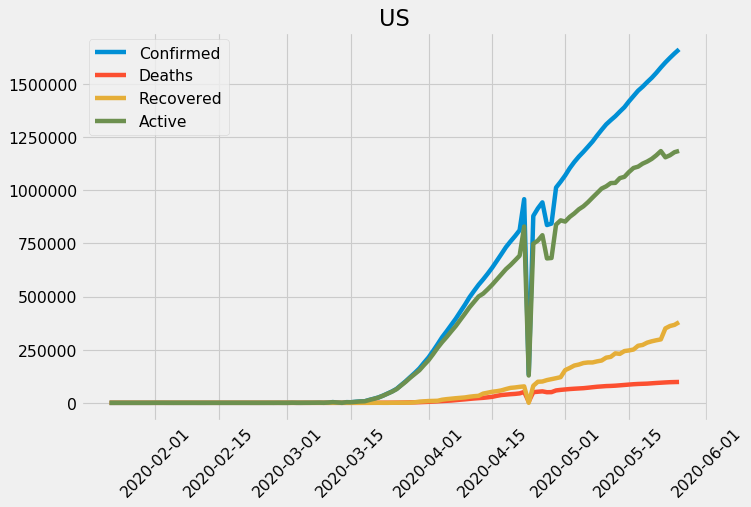

In [53]:
import matplotlib.style as style
style.use('fivethirtyeight')

def plot_country(countries, fields=['Confirmed'], save_fig=False, target_folder='export/images'):
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 9
    fig_size[1] = 6
    fig, ax = plt.subplots(dpi=80)
    for country in countries:
        for field in fields:
            full_data_set_grouped_country = full_data_set_grouped[full_data_set_grouped['Country_Region'] == country]
            plt.plot(full_data_set_grouped_country['Date'], full_data_set_grouped_country[field], label=field)
    ax.legend();
    ax.set_title(','.join(countries))
    plt.xticks(rotation=45)
    if save_fig == True:
        plt.gcf().subplots_adjust(bottom=0.18)
        plt.gcf().subplots_adjust(left=0.12)
        plt.savefig(f'{target_folder}/{countries[0]}.jpg')
    return full_data_set_grouped_country
    
full_data_set_grouped_country = plot_country(['US'], ['Confirmed', 'Deaths', 'Recovered', 'Active'])

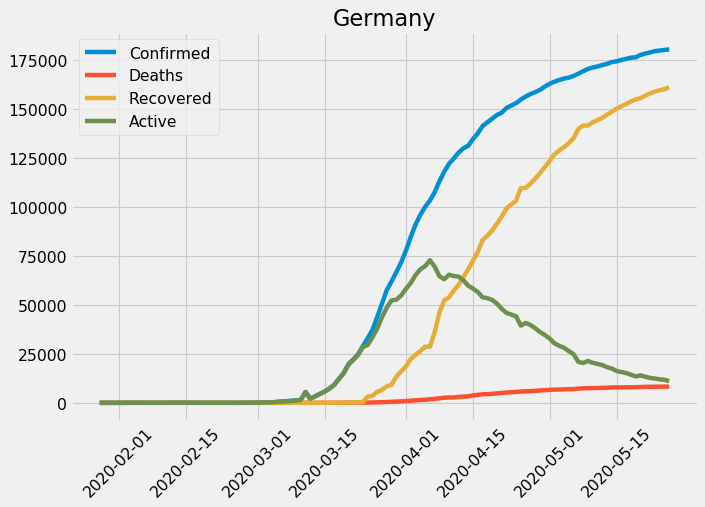

In [54]:
full_data_set_grouped_country = plot_country(['Germany'], ['Confirmed', 'Deaths', 'Recovered', 'Active'])

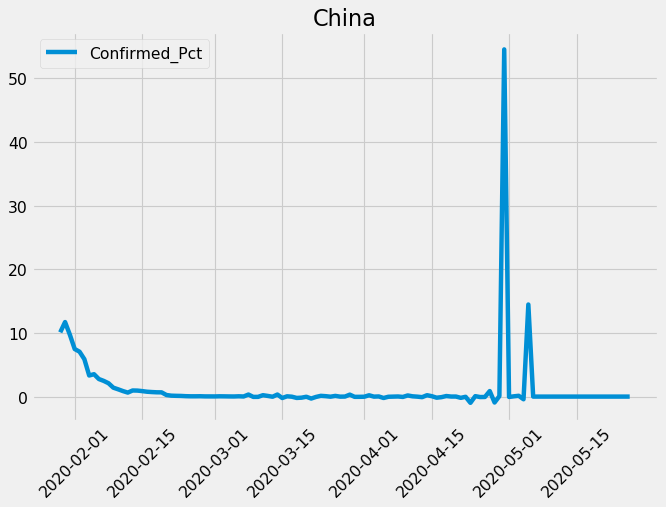

In [55]:
full_data_set_grouped_country = plot_country(['China'], ['Confirmed_Pct'])

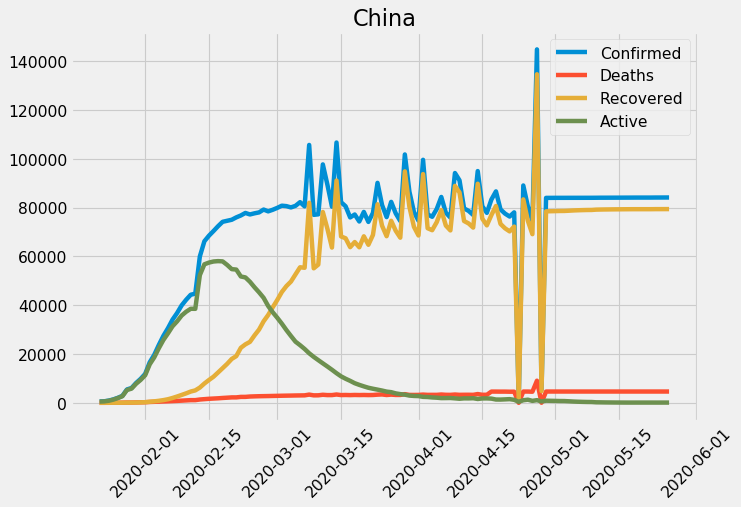

In [56]:
full_data_set_grouped_country = plot_country(['China'], ['Confirmed', 'Deaths', 'Recovered', 'Active'])

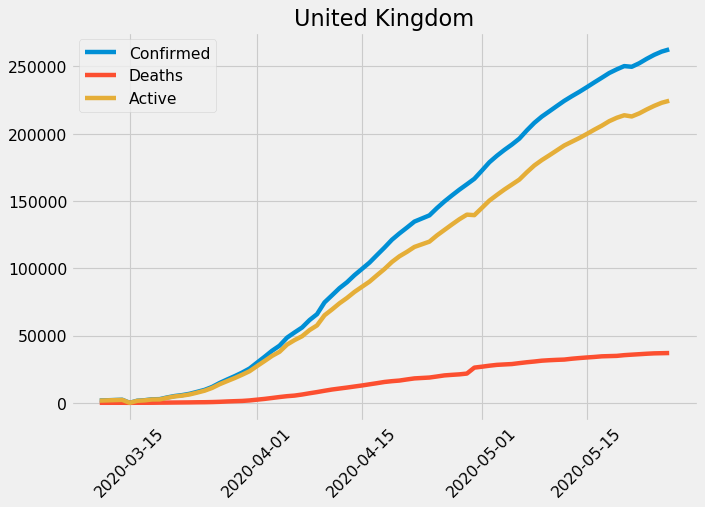

In [57]:
full_data_set_grouped_country = plot_country(['United Kingdom'], ['Confirmed', 'Deaths',  'Active'])

In [58]:
full_data_set_grouped_country.sort_values(['Date']).tail(40)

,Country_Region,Date,Confirmed,Deaths,Recovered,Last_Update,Active,Confirmed_Pct
13623,United Kingdom,2020-04-16,104145,13759,375,2020-04-16 23:30:31,90011,0.581021
13624,United Kingdom,2020-04-17,109769,14607,394,2020-04-17 23:30:32,94768,0.471336
13625,United Kingdom,2020-04-18,115314,15498,414,2020-04-18 22:32:28,99402,0.443699
13626,United Kingdom,2020-04-19,121172,16095,436,2020-04-19 23:40:41,104641,0.422106
13627,United Kingdom,2020-04-20,125856,16550,446,2020-04-20 23:36:27,108860,0.405113
13628,United Kingdom,2020-04-21,130172,17378,638,2020-04-21 23:30:30,112156,0.372471
13629,United Kingdom,2020-04-22,134638,18151,683,2020-04-22 23:30:32,115804,0.353377
13630,United Kingdom,2020-04-24,139246,18791,712,2020-04-24 03:30:31,119743,0.337040
13631,United Kingdom,2020-04-25,144640,19567,724,2020-04-25 06:30:33,124349,0.317676
13632,United Kingdom,2020-04-26,149569,20381,774,2020-04-26 02:30:31,128414,0.297058


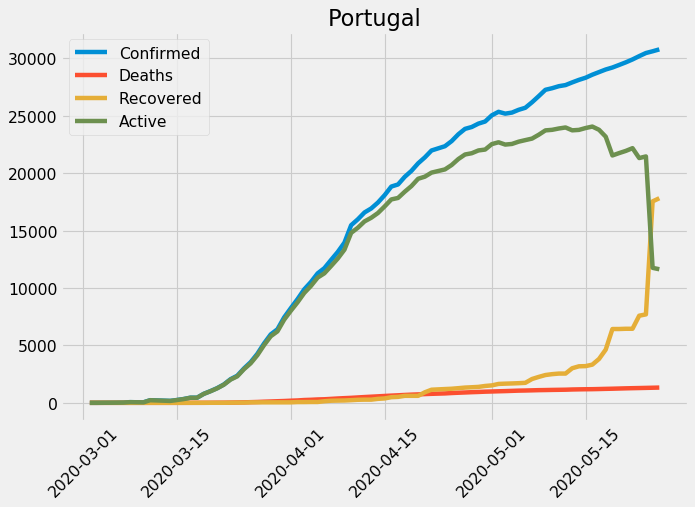

In [59]:
full_data_set_grouped_country = plot_country(['Portugal'], ['Confirmed', 'Deaths', 'Recovered', 'Active'])

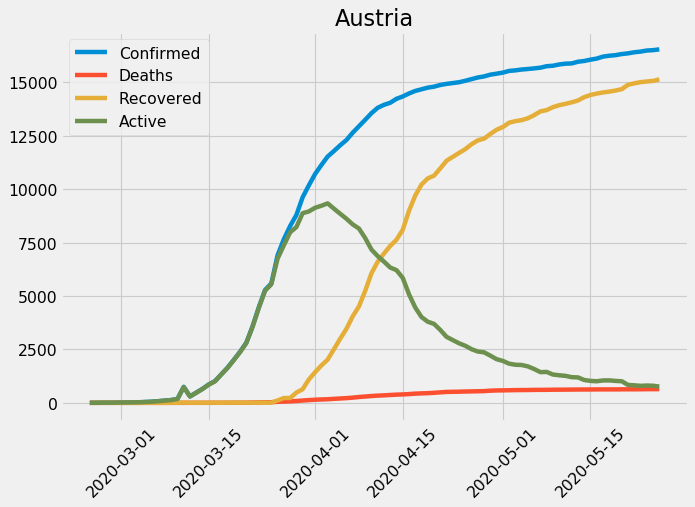

In [60]:
full_data_set_grouped_country = plot_country(['Austria'], ['Confirmed', 'Deaths', 'Recovered', 'Active'])

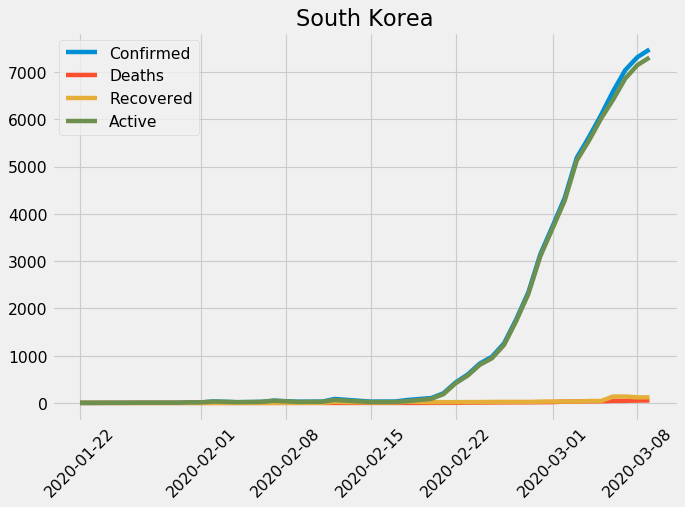

In [61]:
full_data_set_grouped_country = plot_country(['South Korea'], ['Confirmed', 'Deaths', 'Recovered', 'Active'])

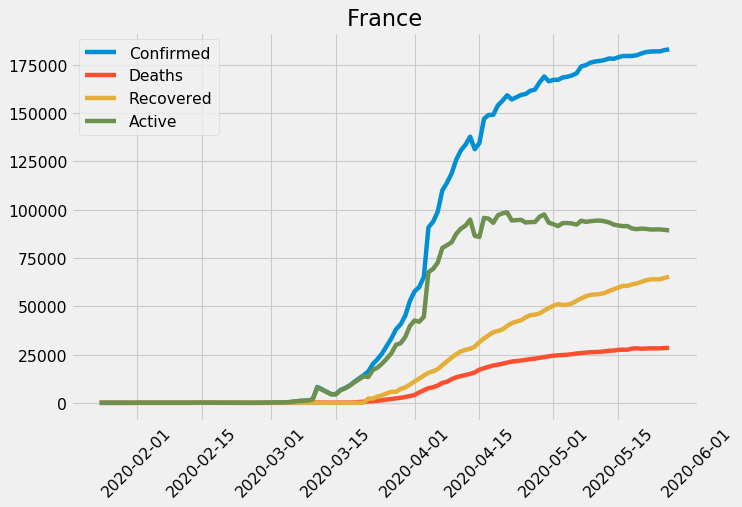

In [62]:
full_data_set_grouped_country = plot_country(['France'], ['Confirmed', 'Deaths', 'Recovered', 'Active'])

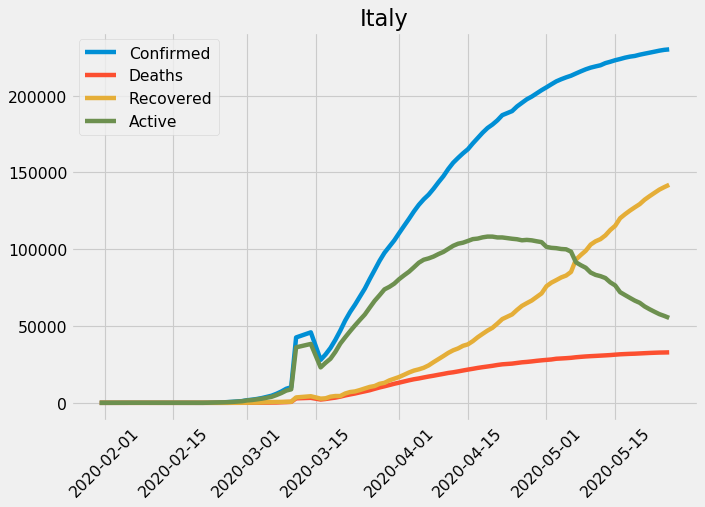

In [63]:
full_data_set_grouped_country = plot_country(['Italy'], ['Confirmed', 'Deaths', 'Recovered', 'Active'])

### Create a graph for each country

In [64]:
!mkdir export
!rm -rf export/images
!mkdir export/images

mkdir: cannot create directory ‘export’: File exists


In [65]:
plt.rcParams.update({'figure.max_open_warning': 0})

In [66]:
all_countries = full_data_set_grouped['Country_Region'].unique()

In [67]:
%%capture
for country in all_countries:
    plot_country([country], ['Confirmed', 'Deaths', 'Recovered', 'Active'], save_fig=True);

### Generate HTML

In [68]:
def escape_country_name(c):
    return c.strip()

In [69]:
def generate_country_list():
    country_list = ''
    for c in all_countries:
        c_strip = escape_country_name(c)
        country_list += f"<li class='list-group-item'><a href='#{c_strip}'>{c_strip}</a></li>"
    return country_list

In [70]:
def generate_country_plots():
    country_plots = ''
    for i, c in enumerate(all_countries):
        if i % 2 == 0:
            country_plots += '<div class="row">'
        c_strip = escape_country_name(c)
        country_plots += f'''
        <div class="col-md-5">
            <a id="{c_strip}">
                <img class="img-fluid" src="../images/{c_strip}.jpg?token=b45ddf94ca509bde49a5fea7520fd973e8d413b4bfce71aa" />
            </a>
        </div>
        '''
        if i % 2 == 1:
            country_plots += '</div>'
    return country_plots

In [71]:
now = datetime.datetime.now()

In [72]:
template = (f'''
<!DOCTYPE html>
<html>
<head>
<style>
#topButton {{
  display: none; /* Hidden by default */
  position: fixed; /* Fixed/sticky position */
  bottom: 20px; /* Place the button at the bottom of the page */
  right: 30px; /* Place the button 30px from the right */
  z-index: 99; /* Make sure it does not overlap */
  border: none; /* Remove borders */
  outline: none; /* Remove outline */
  background-color: red; /* Set a background color */
  color: white; /* Text color */
  cursor: pointer; /* Add a mouse pointer on hover */
  padding: 15px; /* Some padding */
  border-radius: 10px; /* Rounded corners */
  font-size: 18px; /* Increase font size */
}}
</style>
<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/css/bootstrap.min.css" integrity="sha384-Gn5384xqQ1aoWXA+058RXPxPg6fy4IWvTNh0E263XmFcJlSAwiGgFAW/dAiS6JXm" crossorigin="anonymous">
</head>
<body>
    <div class="container-fluid">
        <h2>Covid-19 cases around the world</h2>
        <p>Data sourced from John Hopkins Github repository at <a href='https://github.com/CSSEGISandData/COVID-19'>https://github.com/CSSEGISandData/COVID-19</a></p>
        <p><small>Last updated: {now.strftime("%d-%b-%Y (%H:%M:%S)")}</small></p>
        <div class="row">
            <div class="col-md-2">
                <ul class="list-group">
                    {generate_country_list()}
                </ul>
            </div>
            <div class="col-md-10">
                {generate_country_plots()}
            </div>
        </div>
    </div>
    <button class="btn btn-primary" id="topButton" onclick="javascript: topFunction()">Go to top</button>
<script>
//Get the button:
mybutton = document.getElementById("topButton");

// When the user scrolls down 20px from the top of the document, show the button
window.onscroll = function() {{scrollFunction()}};

function scrollFunction() {{
  if (document.body.scrollTop > 20 || document.documentElement.scrollTop > 20) {{
    mybutton.style.display = "block";
  }} else {{
    mybutton.style.display = "none";
  }}
}}

// When the user clicks on the button, scroll to the top of the document
function topFunction() {{
  document.body.scrollTop = 0; // For Safari
  document.documentElement.scrollTop = 0; // For Chrome, Firefox, IE and Opera
}}
</script>
</body>
</html>
''')

In [73]:
!rm -rf export/html
!mkdir export/html

In [74]:
with(open('export/html/index.html', 'w')) as f:
    f.write(template)

In [75]:
!tar -czvf export.tgz export

export/
export/images/
export/images/The Gambia.jpg
export/images/Venezuela.jpg
export/images/Guam.jpg
export/images/Lesotho.jpg
export/images/Argentina.jpg
export/images/Comoros.jpg
export/images/Saint Vincent and the Grenadines.jpg
export/images/Slovenia.jpg
export/images/Trinidad and Tobago.jpg
export/images/MS Zaandam.jpg
export/images/Poland.jpg
export/images/Republic of Moldova.jpg
export/images/Sweden.jpg
export/images/Liberia.jpg
export/images/Algeria.jpg
export/images/Morocco.jpg
export/images/Austria.jpg
export/images/Jersey.jpg
export/images/Bhutan.jpg
export/images/Djibouti.jpg
export/images/South Africa.jpg
export/images/Republic of Korea.jpg
export/images/Ireland.jpg
export/images/Bahamas, The.jpg
export/images/Kosovo.jpg
export/images/Norway.jpg
export/images/Macao SAR.jpg
export/images/Mali.jpg
export/images/Mongolia.jpg
export/images/Kazakhstan.jpg
export/images/Niger.jpg
export/images/Sao Tome and Principe.jpg
export/images/US.jpg
export/images/India.jpg
export/images